In [2]:
import pandas as pd

In [3]:
!pip install quandl

In [4]:
import quandl

## Create a portfolio

In [5]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2021-01-01')

In [6]:
aapl=quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco=quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm=quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn=quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [7]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CSCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

In [8]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


## Normalize Prices
Same as Cumulative Daily Returns

In [9]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [10]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return']=stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [11]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [12]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation']=stock_df['Normed Return']*allo

In [13]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


## Investment

Let's pretend we invested a million dollars in this portfolio

In [14]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values']=stock_df['Allocation']*1000000

In [15]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


## Total Portfolio Value

In [16]:
portfolio_val=pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],
                         amzn['Position Values']],axis=1)

In [17]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [18]:
portfolio_val.columns=['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [19]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [20]:
portfolio_val['Total Pos']=portfolio_val.sum(axis=1)

In [21]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

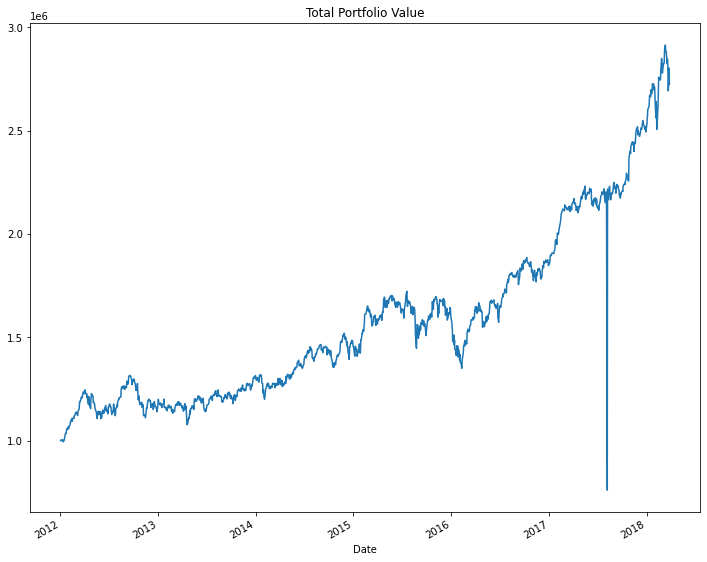

In [23]:
portfolio_val['Total Pos'].plot(figsize=(12,10))
plt.title('Total Portfolio Value')

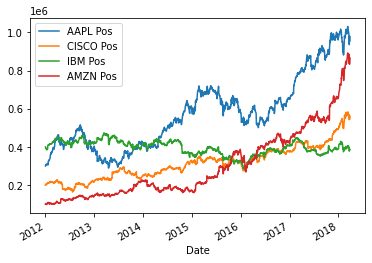

In [24]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

## Portfolio Statistics

### Daily Returns

In [25]:
portfolio_val['Daily Returns']=portfolio_val['Total Pos'].pct_change(1)
portfolio_val

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Returns
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487
...,...,...,...,...,...,...
2018-03-21,972226.673969,567446.158939,397744.940688,883572.585600,2.820990e+06,-0.008665
2018-03-22,958460.984214,551566.374757,386068.211304,862481.148411,2.758577e+06,-0.022125
2018-03-23,936293.966278,543242.294339,377945.269124,835368.374016,2.692850e+06,-0.023826


### Cumulative Return

In [26]:
cum_ret=100*(portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1)
print('Our return {} was percent!'.format(cum_ret))

Our return 172.39781738780346 was percent!


### Average Daily Return

In [27]:
portfolio_val['Daily Returns'].mean()

0.0014927305900954441

### Standard Daily Return

In [28]:
portfolio_val['Daily Returns'].std()

0.05213018140551365

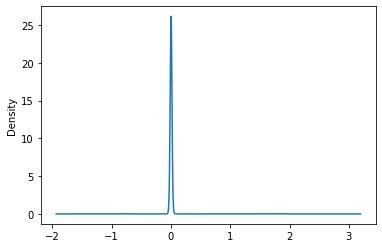

In [29]:
portfolio_val['Daily Returns'].plot(kind='kde')

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [30]:
SR=portfolio_val['Daily Returns'].mean()/portfolio_val['Daily Returns'].std()
SR

0.028634670930524762

In [31]:
ASR=(252**0.5)*SR
ASR

0.4545613089380341

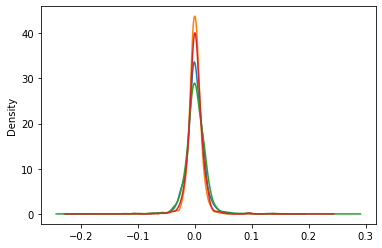

In [32]:
aapl['Adj. Close'].pct_change(1).plot(kind='kde')
ibm['Adj. Close'].pct_change(1).plot(kind='kde')
amzn['Adj. Close'].pct_change(1).plot(kind='kde')
cisco['Adj. Close'].pct_change(1).plot(kind='kde')

In [33]:
import numpy as np
np.sqrt(252)*(np.mean(0.001-0.0002)/0.001)

12.699606293110037